## WINE REVIEW USING NLP

**Author : Kiros Gebremariam                       Data Scientist**

## Meta Data

The wine review dataset contains 129970 wine reviews which include country, wine description, points, price, type of wine, reviewer's name, etc.. The points (ranged from 0 to 100) represents the taste of wine. Higher point indicates better taste. The aim is to build a predictive model and find out the better taste wine in each categories such as dry tasted wine, fluity tasted wine etc..

## Data dictionary

Content The data consists of 10 fields:

**Points:** the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)

**Title:** the title of the wine review, which often contains the vintage if you're interested in extracting that feature Variety: the type of grapes used to make the wine (ie Pinot Noir)

**Description:** Sentences describing the wine's taste, smell, look, feel, etc.from a sommelier.

**Country:** The country that the wine is produced 
**Province:** The specific place where the wine production factory is situated
The province or state that the wine is from Region 1: the wine growing area in a province or state (ie Napa)

**Region:** sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but region 2 this value can sometimes be blank and region 1 has significant amount of data

**Winery:** the winery that made the wine Designation: the vineyard within the winery where the grapes that made the wine are from Price: the cost for a bottle of the wine

**Taster Name:** name of the person who tasted and reviewed the wine Taster

**Twitter Handle:** Twitter handle for the person who tasted and reviewed the wine Acknowledgements

**Variety:** This is expalins the type of wine.

The data was scraped from WineEnthusiast during the week of July 20th, 2018.

### Problem Statement

The following hypothesis will be come up with:

1. Higher-priced wines will score 90+ points more often than lower-priced wines?
2. Sweeter wine generally get higher points than dry tasted wine.
3. How much do reviewer's comments accurate ? (Can we trust thier reviewer's comments when we select the wine.

### Loading Necessary packages 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


## Loading the common wine types

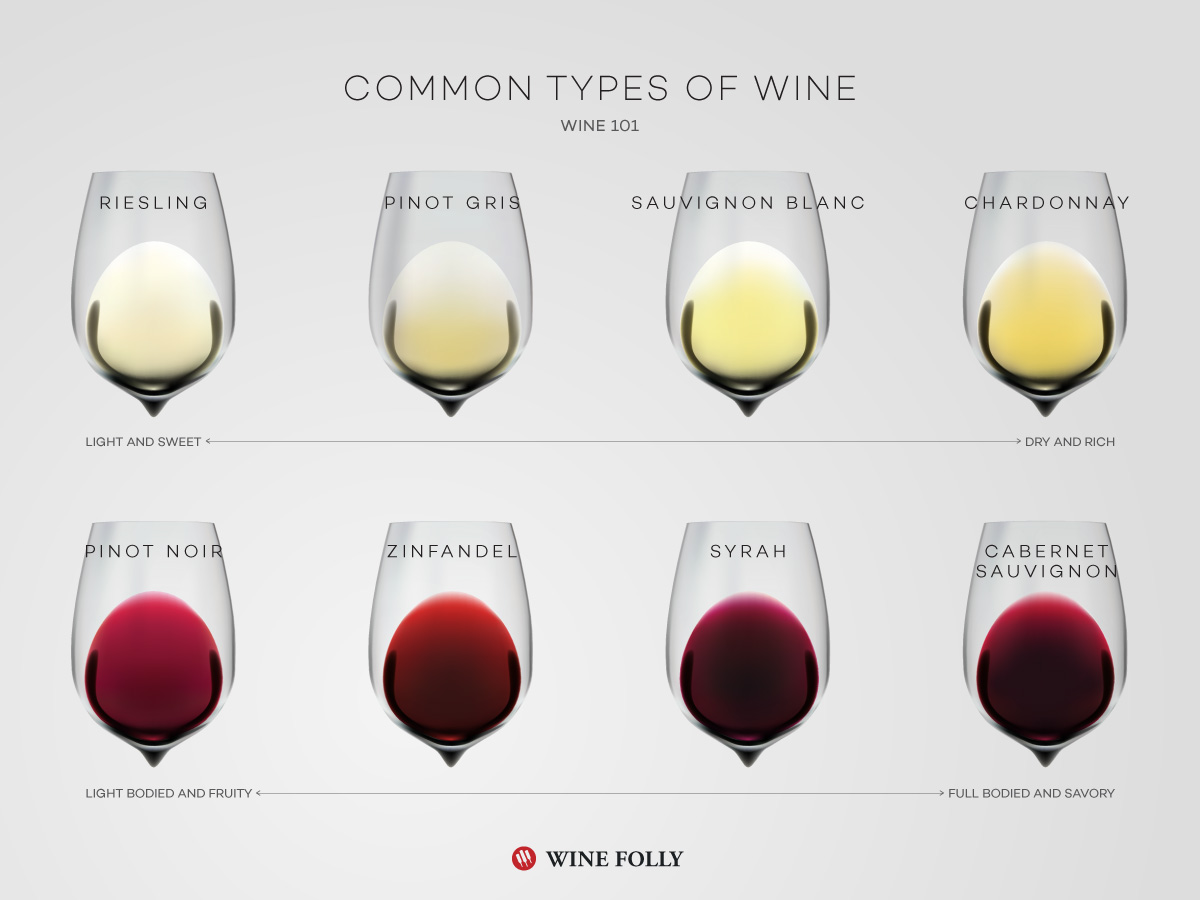

In [2]:
from IPython.display import Image
from __future__ import unicode_literals
Image(filename='./wine-reviews/common-types-of-wine-by-wine-folly.jpg')

### loading the Dataset

In [3]:
#load in data
df = pd.read_csv('./wine-reviews/winemag-data-130k-v2.csv')
# see data contents
df.drop(['Unnamed: 0'],axis =1, inplace =True)
df.head()[:5]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Exploratory data analysis 

In [4]:
print("================<Exploratory data analysis>==================================")
# clean data (drop NaN in price, variety and country)

df = df.dropna(subset=['price','country','variety'])
print(df.count())
print("===========================================================================")

================<Exploratory data analysis>==================================
country                  120915
description              120915
designation               86148
points                   120915
price                    120915
province                 120915
region_1                 101400
region_2                  50292
taster_name               96420
taster_twitter_handle     91500
title                    120915
variety                  120915
winery                   120915
dtype: int64


In [5]:
print("=========================<Check how many variety of wine are>===========================")
print(df['variety'].value_counts())
print("=========================================================================================")

=========================<Check how many variety of wine are>===========================
Pinot Noir                      12785
Chardonnay                      11077
Cabernet Sauvignon               9384
Red Blend                        8466
Bordeaux-style Red Blend         5340
Riesling                         4971
Sauvignon Blanc                  4780
Syrah                            4086
Rosé                             3261
Merlot                           3061
Zinfandel                        2708
Malbec                           2593
Sangiovese                       2377
Nebbiolo                         2331
Portuguese Red                   2196
White Blend                      2167
Sparkling Blend                  2027
Tempranillo                      1788
Rhône-style Red Blend            1404
Pinot Gris                       1388
Cabernet Franc                   1304
Champagne Blend                  1211
Grüner Veltliner                 1145
Pinot Grigio                     1002

In [6]:
# Since so many variety of wine available in this dataset, its important to only focus with top ones
# Therefore, inorder to reduce the data i will use boolean method of filtering more than 1000 reviews  only ignoring
# the types of wines with less than 1000 reviews and the basic reason is to compare across different countries and 
# to see the type of wines that have better customer review and feedbacks as the dataset contains many countries
#  like US,Portugal,France,Australia, Germany,Argentina,Chile,Austria, NewZealand,Isreael and others
# Therefore, after i filter them out i created a dataframe with dfg=dataframe group and 
# i printed the top five rows to see what the datalooks like after filtering.
# As explianed above in the data dictionary the region_2 column or feature has very few information and may show NaN 
# some of the testers may not have twitter account and will show NaN
dfg=df.groupby('variety').filter(lambda x: len(x) >1000) # New dataset
#dfg = pd.DataFrame({col:vals['points'] for col,vals in variety.groupby('variety')})
dfg.head()[:5]
#print (dfg['variety'].value_counts())

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [7]:
dfg['variety'].value_counts()

Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Zinfandel                    2708
Malbec                       2593
Sangiovese                   2377
Nebbiolo                     2331
Portuguese Red               2196
White Blend                  2167
Sparkling Blend              2027
Tempranillo                  1788
Rhône-style Red Blend        1404
Pinot Gris                   1388
Cabernet Franc               1304
Champagne Blend              1211
Grüner Veltliner             1145
Pinot Grigio                 1002
Name: variety, dtype: int64

Text(0,0.5,'price')

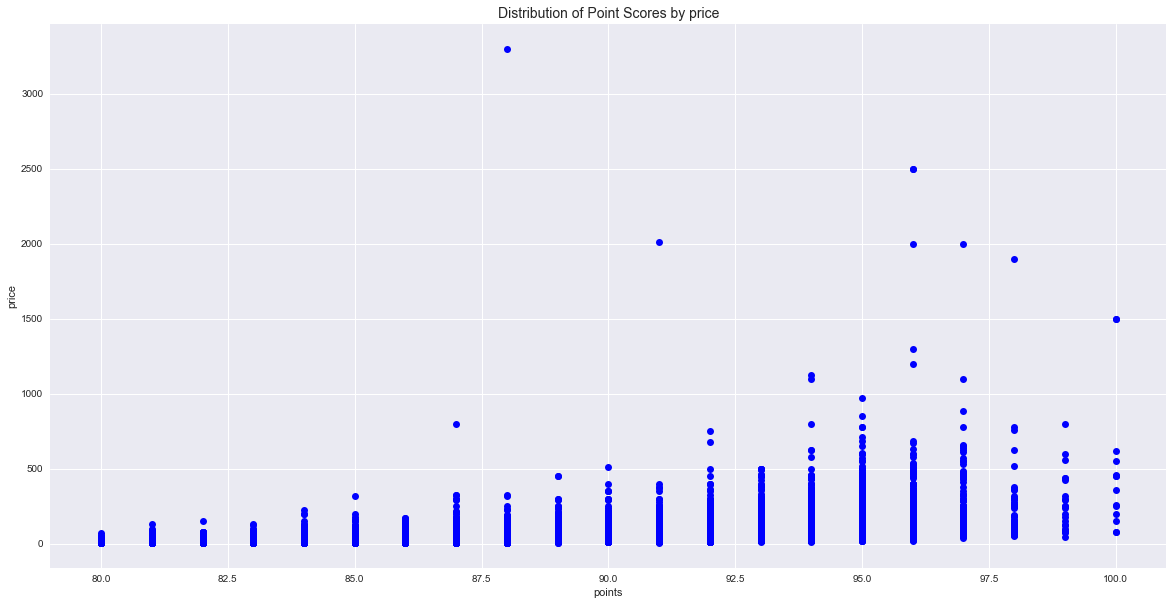

In [8]:
# To check my dataset looks like
# plot data (price and points)
fig, ax = plt.subplots(figsize = (20,10))
x = dfg['points']
y = dfg['price']

plt.plot(x,y,'bo')
plt.title('Distribution of Point Scores by price',size=14) 
plt.xlabel('points') 
plt.ylabel('price') 

Text(0,0.5,'price')

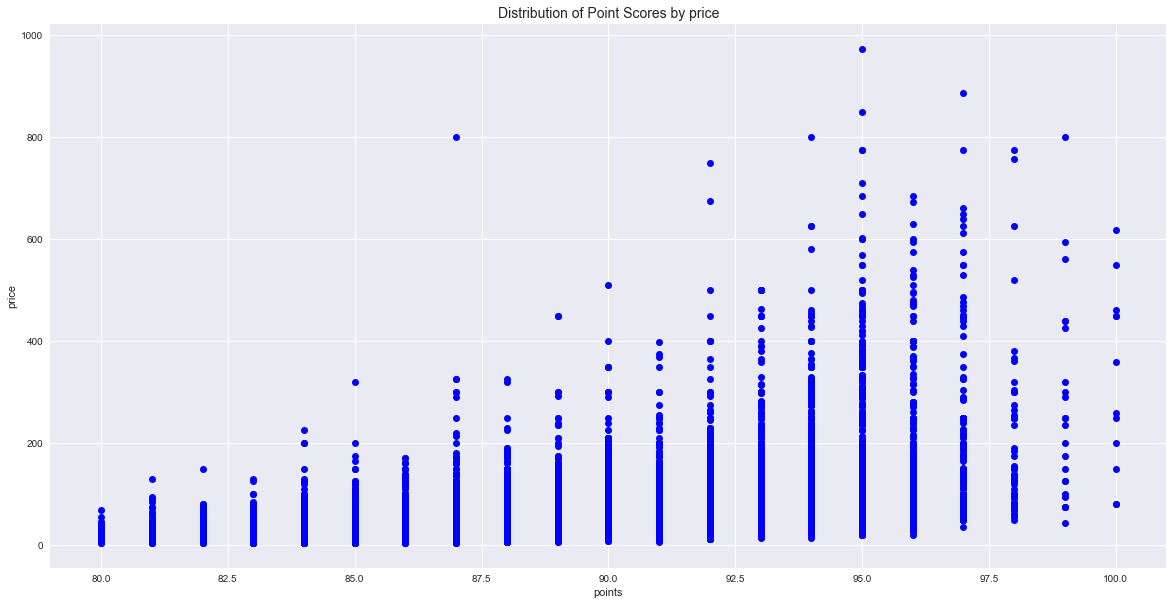

In [9]:
#Above figure indicates that three over priced wines
#Therefore, I remove those
fig, ax = plt.subplots(figsize = (20,10))
df1 = dfg.drop(dfg[dfg.price > 1000].index)
x = df1['points']
y = df1['price']
plt.plot(x,y,'bo');
plt.title('Distribution of Point Scores by price',size=14) 
plt.xlabel('points') 
plt.ylabel('price') 

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

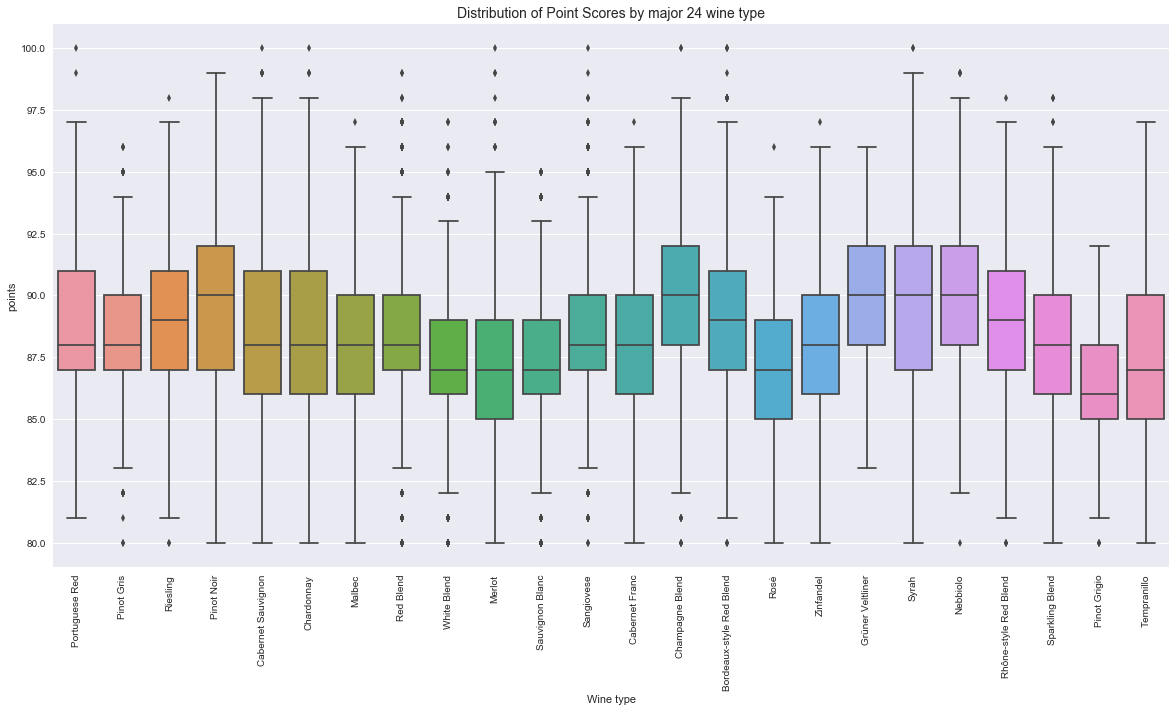

In [10]:
#Showing the example of the result of the initial data processing.

import matplotlib.pyplot as plt
# import sys
# reload(sys)
# sys.setdefaultencoding('utf-8')
fig, ax = plt.subplots(figsize = (20,10))
chart = sns.boxplot(x='variety',y='points', data=df1, ax = ax)
plt.title('Distribution of Point Scores by major 24 wine type',size=14) 
plt.xlabel('Wine type') 
plt.xticks(rotation = 90)

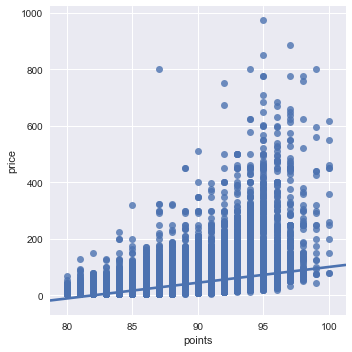

In [11]:
# For this process, Ordinary Least Square method (OLS) used. 
from scipy.stats import pearsonr #Pearson correlation coefficient calculator
import statsmodels.api as sm
# First plot result
sns.lmplot(y = 'price', x='points', data=df1)

In [12]:
# Pearson correltion between price and point
pearsonr(df1.price, df1.points)

(0.47715940643215621, 0.0)

In [13]:
# Showing the table for the OLS calculation results
sm.OLS(df1.points, df1.price).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                 1.035e+05
Date:                Tue, 24 Jul 2018   Prob (F-statistic):               0.00
Time:                        01:03:43   Log-Likelihood:            -5.1325e+05
No. Observations:               92838   AIC:                         1.026e+06
Df Residuals:                   92837   BIC:                         1.027e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          1.2419      0.004    321.704      0.000       1.234       1.249
==============================================================================
Omnibus:                   117944.587   Durbin-Watson:                   0.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         30704930.170
Skew:                          -6.906   Prob(JB):                         0.00
Kurtosis:                      91.016   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comment:
Unexpectedly, there's not a significant correlation between the cost of wine and its rating (because 0.477 == moderate relationship (usually 0.5 ~ 1.0 == strong relationship)), namely there is an average $1.24 increase for every one point incrase in rating.

## Application of Simple NLP process

Hypothies 2: Sweeter wine generally get higher points than dry tasted wine.

To answer above question, I will try to classify the better wines and worse wines in the dataset. I use 30% of wines with lowest number of points defined as the "worse" wines and 30% of wines with the highest points defined as the "better" wines.

In [14]:
df_sorted = df1.sort_values(by='points', ascending=True)  # sort by points

num_of_wines = df_sorted.shape[0]  # number of wines
worse = df_sorted.head(int(0.3*num_of_wines))  # 30 % of worst wines listed
better = df_sorted.tail(int(0.3*num_of_wines))  # 30 % of best wines listed

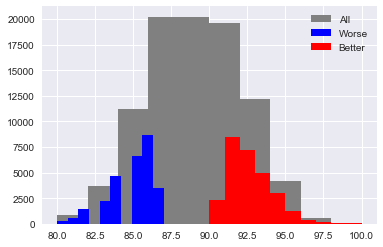

In [15]:
# Show the data that used in this process

plt.hist(df1['points'], color='grey', label='All')
plt.hist(worse['points'], color='blue', label='Worse')
plt.hist(better['points'], color='red', label='Better')
plt.legend()
plt.show()

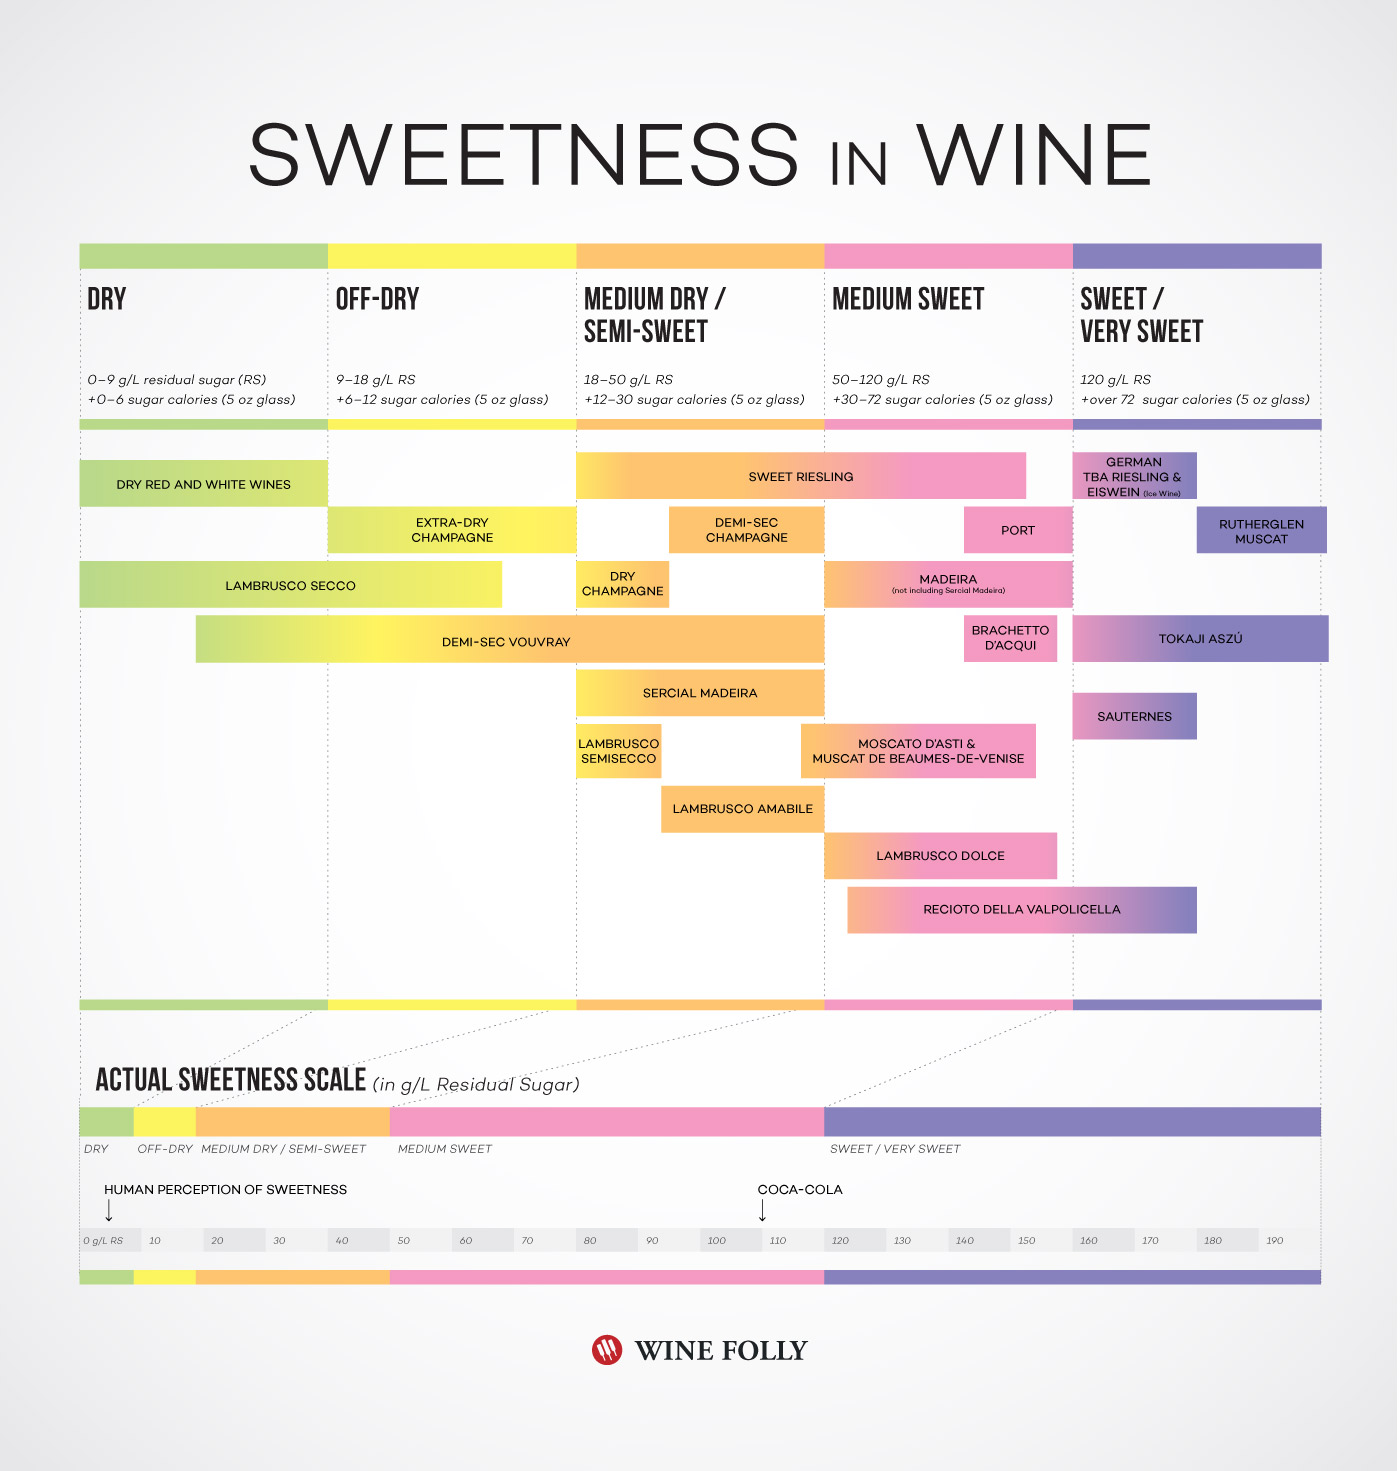

In [16]:
# from IPython.display import Image
Image(filename='./wine-reviews/wine-sweetness-chart-wine-folly1.jpg')

In [17]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
 
def word_feats(words):
    return dict([(word, True) for word in words])
# just select few words to express sweet and dry
sweet_vocab = [ 'sweet', 'Fruit', 'port', 'muscat', 'semi sweet', 'medium sweet', 'very sweet', 'sauterves',':)' ]
dry_vocab = [ 'dry', 'off dry', 'medium dry','secco', 'extra', ':(' ]
unknown_vocab = [ 'the','are','were', 'was','is','did','words','not' ]
 
sweet_features = [(word_feats(sweet), 'sweet') for sweet in sweet_vocab]
dry_features = [(word_feats(dry), 'dry') for dry in dry_vocab]
unknown_features = [(word_feats(unk), 'unk') for unk in unknown_vocab]
 
train_set = dry_features + sweet_features + unknown_features
 
classifier = NaiveBayesClassifier.train(train_set) 


In [18]:
# define function for classifying sweet and dry
def dry_sweet(sentence):
    sentence= sentence.lower()
    words = sentence.split(' ')
    dry=0
    sweet=0
    #words
    for word in words:
        classResult = classifier.classify( word_feats(word))
        if classResult == 'dry':
            dry = dry + 1
        if classResult == 'sweet':
            sweet = sweet + 1
    s = str(float(sweet)/len(words))
    d = str(float(dry)/len(words))
    return(s, d)

In [19]:
# Converting description into the point (numerical numbers)
worse['s & d']= worse['description'].apply(lambda x: dry_sweet(x))
better['s & d']= better['description'].apply(lambda x: dry_sweet(x))

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
type(worse['s & d'][1])

tuple

In [21]:
# Add new columuns into dataframes
worse[['sweet', 'dry']] = worse['s & d'].apply(pd.Series)
better[['sweet', 'dry']] = better['s & d'].apply(pd.Series)

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [22]:
type(worse['s & d'][1])

tuple

In [23]:
# Add new columuns into dataframes
worse[['sweet', 'dry']] = worse['s & d'].apply(pd.Series)
better[['sweet', 'dry']] = better['s & d'].apply(pd.Series)

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [24]:
better.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27851 entries, 40832 to 42197
Data columns (total 16 columns):
country                  27851 non-null object
description              27851 non-null object
designation              22762 non-null object
points                   27851 non-null int64
price                    27851 non-null float64
province                 27851 non-null object
region_1                 24194 non-null object
region_2                 14566 non-null object
taster_name              22897 non-null object
taster_twitter_handle    22025 non-null object
title                    27851 non-null object
variety                  27851 non-null object
winery                   27851 non-null object
s & d                    27851 non-null object
sweet                    27851 non-null object
dry                      27851 non-null object
dtypes: float64(1), int64(1), object(14)
memory usage: 3.6+ MB


In [25]:
# convert object into numeric
worse['sweet']=worse['sweet'].astype('float64')
better['sweet']=better['sweet'].astype('float64')

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
'Worse =', worse.sweet.mean(), 'Better =', better.sweet.mean()

('Worse =', 0.5838702749862196, 'Better =', 0.5806236159437026)

Comment: Worse wines are slightly sweeter than better wines. That means my hypothesis was wrong.

# Application of Natural Language Processing 

In [27]:
#Load requisite packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.stem.porter import PorterStemmer

In [28]:
# Start EDA process
# clean data (drop NaN in price, variety and country)
df = df.dropna(subset=['price','country','variety'])
df.count()

country                  120915
description              120915
designation               86148
points                   120915
price                    120915
province                 120915
region_1                 101400
region_2                  50292
taster_name               96420
taster_twitter_handle     91500
title                    120915
variety                  120915
winery                   120915
dtype: int64

In [29]:
# Check how many country produce wine?
df['country'].value_counts()

US                        54265
France                    17776
Italy                     16914
Spain                      6573
Portugal                   4875
Chile                      4415
Argentina                  3756
Austria                    2799
Australia                  2294
Germany                    2120
New Zealand                1378
South Africa               1293
Israel                      489
Greece                      461
Canada                      254
Hungary                     145
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Georgia                      84
Slovenia                     80
Croatia                      71
Mexico                       70
England                      69
Moldova                      59
Brazil                       47
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Czech Re

In [30]:
# This time only US wine will be used,
df_US = df[(df.country == 'US') ]
df_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54265 entries, 2 to 129967
Data columns (total 13 columns):
country                  54265 non-null object
description              54265 non-null object
designation              36751 non-null object
points                   54265 non-null int64
price                    54265 non-null float64
province                 54265 non-null object
region_1                 53989 non-null object
region_2                 50292 non-null object
taster_name              37511 non-null object
taster_twitter_handle    34535 non-null object
title                    54265 non-null object
variety                  54265 non-null object
winery                   54265 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 5.8+ MB


In [31]:
# extract all words in descriptions for US wine
us_descs = df_US['description'].values
us_descs = " ".join(us_descs)

In [32]:
def tokenize(text):
    text = text.lower()
    text = re.sub('[' + string.punctuation + '0-9\\r\\t\\n]', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [w for w in tokens if len(w) > 2]
    tokens = [w for w in tokens if not w in ENGLISH_STOP_WORDS]
    return tokens 

def stemwords(words):
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words] # stem words 
    return words

In [33]:
!pip install nltk

In [34]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages (18.0)


In [35]:
# import nltk
# nltk.download('punkt')

In [36]:
# import nltk
# nltk.download()

In [37]:
# create counter of best words 
us_words = stemwords(tokenize(us_descs))
us_ctr = Counter(us_words)

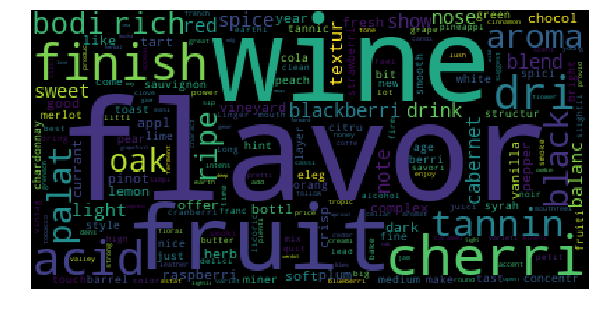

In [38]:
# cloud for best words
wordcloud = WordCloud()
wordcloud.fit_words(us_ctr)

fig=plt.figure(figsize=(10, 6))   # Prepare a plot 5x3 inches
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Logistic regression for classiffying

Hypothesis 3: How much accurate the reviewer's comments? (Can we predict the wine-type from their descriptions?)

In [39]:
# Again clean data
from sklearn.model_selection import train_test_split
data = df1.drop(['country','designation','points','province','region_1','region_2','variety','winery'], axis = 1)
y = df1.variety

data_train, data_test, y_train, y_test = train_test_split(data, y, random_state=1)
print(data_train.shape, data_test.shape, y_train.shape, y_test.shape)

(69628, 5) (23210, 5) (69628,) (23210,)


In [40]:
# Make list for thr wine-type

wine =df1.variety.unique().tolist()
wine.sort()
wine[:24]

['Bordeaux-style Red Blend',
 'Cabernet Franc',
 'Cabernet Sauvignon',
 'Champagne Blend',
 'Chardonnay',
 'Grüner Veltliner',
 'Malbec',
 'Merlot',
 'Nebbiolo',
 'Pinot Grigio',
 'Pinot Gris',
 'Pinot Noir',
 'Portuguese Red',
 'Red Blend',
 'Rhône-style Red Blend',
 'Riesling',
 'Rosé',
 'Sangiovese',
 'Sauvignon Blanc',
 'Sparkling Blend',
 'Syrah',
 'Tempranillo',
 'White Blend',
 'Zinfandel']

In [41]:
# Make lower case of every wine-type
output = set()
for x in df1.variety:
    x = x.lower()
    x = x.split()
    for y in x:
        output.add(y)

variety_list =sorted(output)
variety_list[:24]

['blanc',
 'blend',
 'bordeaux-style',
 'cabernet',
 'champagne',
 'chardonnay',
 'franc',
 'grigio',
 'gris',
 'grüner',
 'malbec',
 'merlot',
 'nebbiolo',
 'noir',
 'pinot',
 'portuguese',
 'red',
 'rhône-style',
 'riesling',
 'rosé',
 'sangiovese',
 'sauvignon',
 'sparkling',
 'syrah']

In [42]:
extras = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', 'cab',"%"]
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop.update(variety_list)
stop.update(extras)

In [43]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(stop_words = stop)
data_train_dtm = vect.fit_transform(data_train.description)
price = data_train.price.values[:,None]
data_train_dtm = hstack((data_train_dtm, price))
data_train_dtm

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bordeaux', 'rhône', 'style'] not in stop_words.
  sorted(inconsistent))


<69628x24200 sparse matrix of type '<class 'numpy.float64'>'
	with 1748470 stored elements in COOrdinate format>

In [44]:
data_test_dtm = vect.transform(data_test.description)
price_test = data_test.price.values[:,None]
data_test_dtm = hstack((data_test_dtm, price_test))
data_test_dtm

<23210x24200 sparse matrix of type '<class 'numpy.float64'>'
	with 578953 stored elements in COOrdinate format>

In [45]:
# Create predicting model using Logistic regression
# Step 1 creating regression model using logistic regression
from sklearn.linear_model import LogisticRegression
models = {}
for z in wine:
    model = LogisticRegression(random_state=0)
    y = y_train == z
    model.fit(data_train_dtm, y)
    models[z] = model

testing_model = pd.DataFrame(columns = wine)

In [46]:
#Show the test model
testing_model

,Bordeaux-style Red Blend,Cabernet Franc,Cabernet Sauvignon,Champagne Blend,Chardonnay,Grüner Veltliner,Malbec,Merlot,Nebbiolo,Pinot Grigio,...,Rhône-style Red Blend,Riesling,Rosé,Sangiovese,Sauvignon Blanc,Sparkling Blend,Syrah,Tempranillo,White Blend,Zinfandel


In [47]:
# Create predicting model using Logistic regression
# Step 2 making predicted model
for variety in wine:
    testing_model[variety] = models[variety].predict_proba(data_test_dtm)[:,1]
    
predicted_wine = testing_model.idxmax(axis=1)

comparison = pd.DataFrame({'actual':y_test.values, 'predicted':predicted_wine.values})   

from sklearn.metrics import accuracy_score
#Show the results (accuracy of the predicted model)
'Accuracy Score:',accuracy_score(comparison.actual, comparison.predicted)*100,"%"

('Accuracy Score:', 64.136148211977599, '%')

In [48]:
# Show results
comparison.head(24)

,actual,predicted
0,Pinot Gris,Sauvignon Blanc
1,Sauvignon Blanc,Sauvignon Blanc
2,Chardonnay,Chardonnay
3,Chardonnay,Chardonnay
4,Chardonnay,Chardonnay
5,Rosé,Sauvignon Blanc
6,Pinot Noir,Pinot Noir
7,Red Blend,Red Blend
8,Syrah,Pinot Noir
9,Pinot Noir,Pinot Noir


Comments: Wine reviews do not represent accurately wine-types.(64% of accuracy)

# Notes taken

The following things are found:

A.There's not a significant correlation between the cost of wine and its rating (because 0.477 == moderate relationship (usually 0.5 ~ 1.0 == strong relationship)), namely theres an average $1.24 increase for every one point incrase in rating.
B. Worse wines are slightly sweeter than better wines.
C. Wine reviews do not represent accurately wine-types.(64% of accuracy)